In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('flight_train.csv')
df_test = pd.read_csv('flight_test.csv')
df_train.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
print(df_train.shape)
print(df_test.shape)

(55000, 23)
(7988, 23)


In [4]:
df = pd.concat([df_train,df_test])
print(df.shape)
df.head()

(62988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [5]:
df[df.duplicated()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        6298

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,NaN,NaN,NaN,31494.5,18183.213715,1.0,15747.75,31494.5,47241.25,62988.0
FFP_DATE,62988,3068,1/13/2011,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,Male,48134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988.0,NaN,NaN,NaN,4.102162,0.373856,4.0,4.0,4.0,4.0,6.0
WORK_CITY,60719,3234,guangzhou,9386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1165,guangdong,17509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,62568.0,NaN,NaN,NaN,42.476346,9.885915,6.0,35.0,41.0,48.0,110.0
LOAD_TIME,62988,1,3/31/2014,62988,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

<AxesSubplot:>

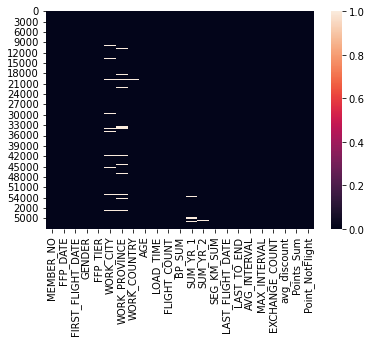

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(),inplace=True)

In [12]:
df['SUM_YR_1'].isnull().sum()

0

In [15]:
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(),inplace=True)

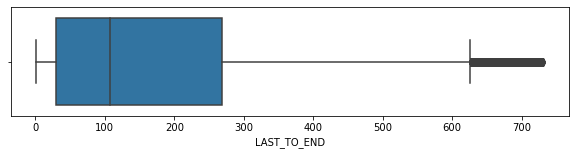

In [23]:
plt.figure(figsize=(10,2))
sns.boxplot(x='LAST_TO_END',data=df)
plt.show()


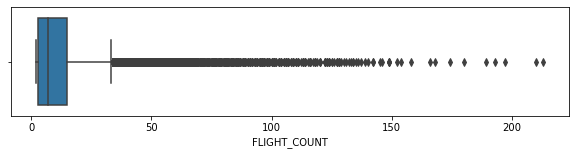

In [24]:
plt.figure(figsize=(10,2))
sns.boxplot(x='FLIGHT_COUNT',data=df)
plt.show()


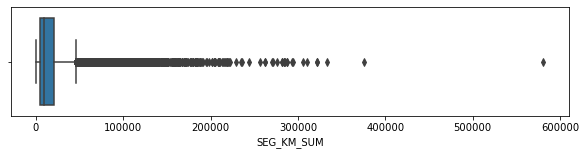

In [25]:
plt.figure(figsize=(10,2))
sns.boxplot(x='SEG_KM_SUM',data=df)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62988 non-null  float64
 13  SUM_YR_2           62988 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        6298

In [30]:
df['FFP_DATE']=pd.to_datetime(df['FFP_DATE'])
df['LOAD_TIME']=pd.to_datetime(df['LOAD_TIME'])

In [33]:
df['LENGTH']=np.abs(df['LOAD_TIME']-df['FFP_DATE'])
df['LENGTH']=df['LENGTH'].apply(lambda dd : dd.days)

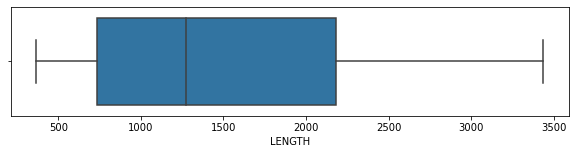

In [34]:
plt.figure(figsize=(10,2))
sns.boxplot(x='LENGTH',data=df)
plt.show()

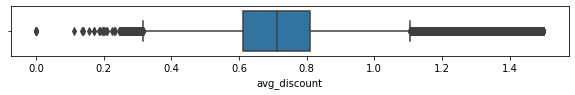

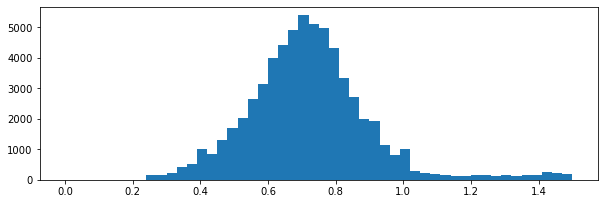

In [39]:
plt.figure(figsize=(10,2))
plt.subplot(211)
sns.boxplot(x='avg_discount',data=df)
plt.figure(figsize=(10,7))
plt.subplot(212)
plt.hist(df['avg_discount'],bins=50)
plt.show()

In [ ]:
# index1=data['SUM_YR_1'] !=0
# index2=data['SUM_YR_2'] !=0
# index3=(data['SEG_KM_SUM'] ==0)*(data['avg_discount']==0)

In [40]:
df_lrfmc=df[['MEMBER_NO','LENGTH','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_lrfmc.columns = ['MEMBER_NO','L','R','F','M','C']
df_lrfmc_drop=df_lrfmc[['L','R','F','M','C']]

In [41]:
df_lrfmc_drop.describe()


,L,R,F,M,C
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,1485.000826,176.120102,11.839414,17123.878691,0.721558
std,847.222941,183.822223,14.049471,20960.844623,0.185427
min,365.000000,1.000000,2.000000,368.000000,0.000000
25%,732.000000,29.000000,3.000000,4747.000000,0.611997
50%,1270.000000,108.000000,7.000000,9994.000000,0.711856
75%,2179.000000,268.000000,15.000000,21271.250000,0.809476
max,3437.000000,731.000000,213.000000,580717.000000,1.500000


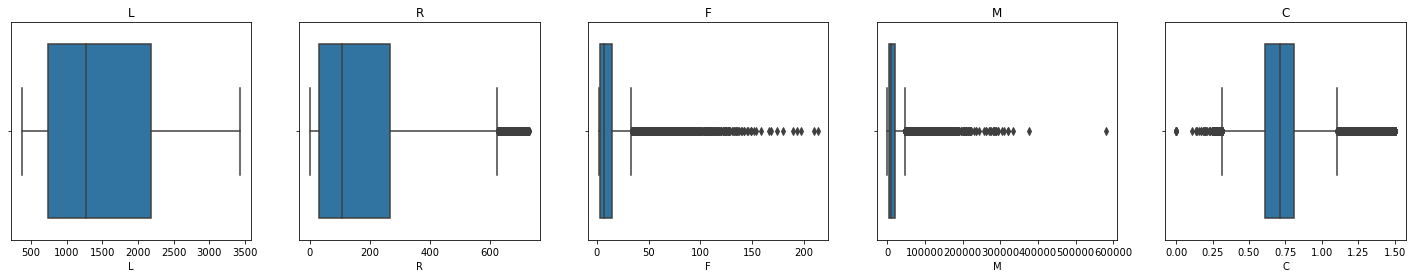

In [44]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(x=col,data=df_lrfmc_drop)
        plt.title(col)
        i = i+1     
dist_list(LRFM)

In [58]:
rfm_log=df_lrfmc_drop.copy()

In [59]:
cols=['R','F','M','C']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

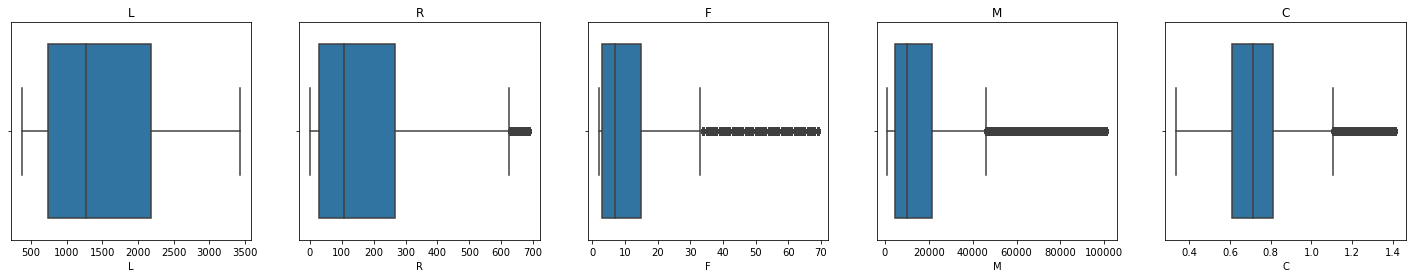

In [60]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(x=col,data=rfm_log)
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [61]:
rfm_log.shape

(62988, 5)

In [62]:
rfm_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 7987
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       62988 non-null  int64  
 1   R       62988 non-null  int64  
 2   F       62988 non-null  int64  
 3   M       62988 non-null  float64
 4   C       62988 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.9 MB


In [63]:
from sklearn.preprocessing import MinMaxScaler


In [64]:
scaler = MinMaxScaler()
scaler.fit(rfm_log)
rfm_log = scaler.transform(rfm_log)

In [66]:
rfm_log.shape

(62988, 5)

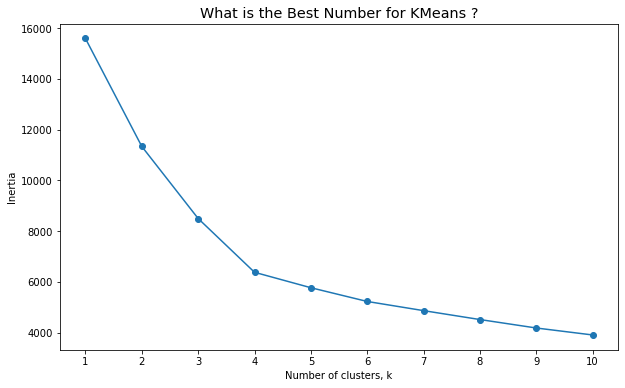

In [70]:
from sklearn.cluster import KMeans

ks = range(1,11)
inertias=[]
for k in ks :
    kmeans = KMeans(n_clusters=k,random_state=142)
    kmeans.fit(rfm_log)
    cluster = kmeans.fit_predict(rfm_log)
    inertias.append(kmeans.inertia_)


f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [73]:
from sklearn.metrics import silhouette_score


for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(rfm_log)
    preds = clusterer.predict(rfm_log)

    
    score = silhouette_score(rfm_log, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.18328601751848836
For n_clusters = 3. The average silhouette_score is : 0.21378102497432125
For n_clusters = 4. The average silhouette_score is : 0.2362368964743744
For n_clusters = 5. The average silhouette_score is : 0.2116165923900991


In [76]:
kmeans = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kmeans.fit(rfm_log)
cluster_labels = kmeans.labels_

In [79]:
rfm_log = pd.DataFrame( rfm_log,columns=['L','R','F','M','C'])

In [80]:
data_c = rfm_log.assign(K_Cluster = cluster_labels)
data_label=df_lrfmc.assign(K_Cluster = cluster_labels)

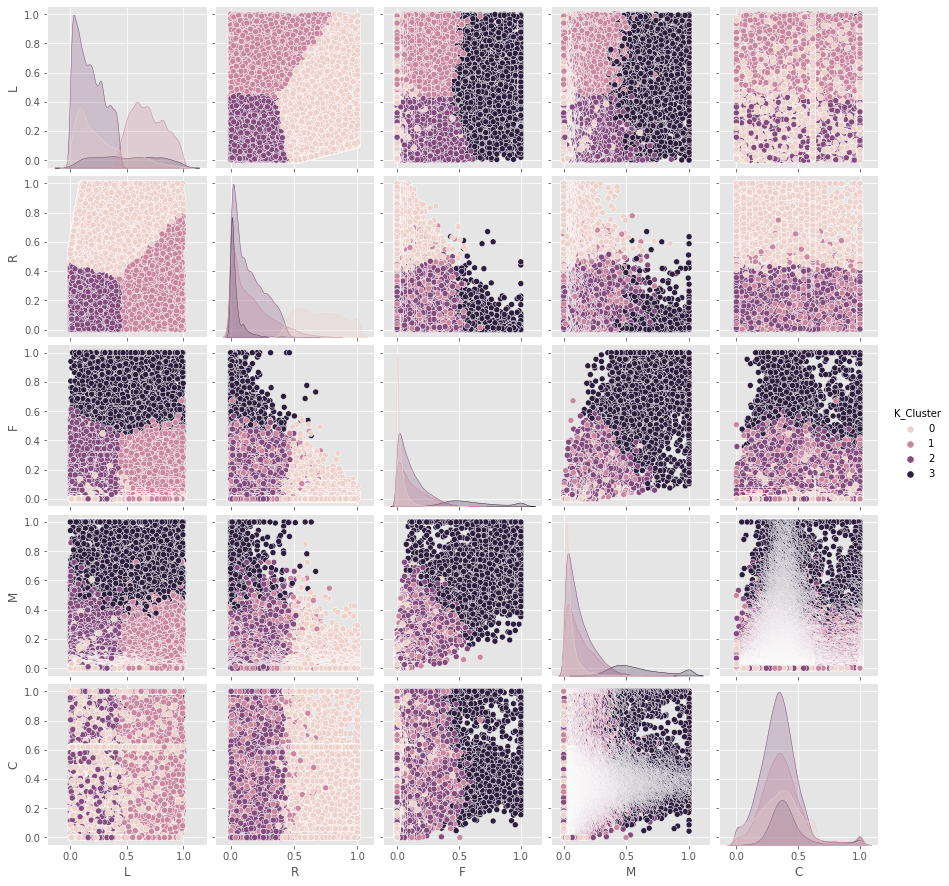

In [81]:
sns.pairplot(data=data_c, hue='K_Cluster')

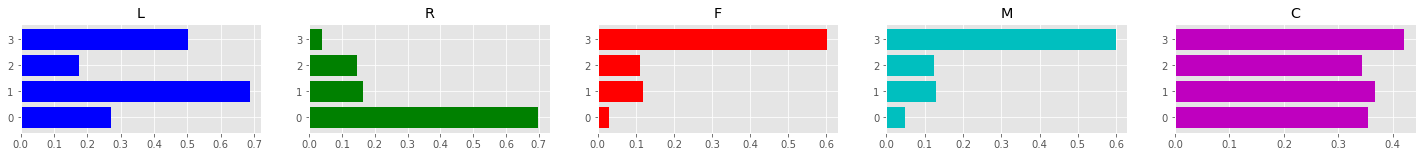

In [82]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

CPU times: total: 7.02 s
Wall time: 938 ms


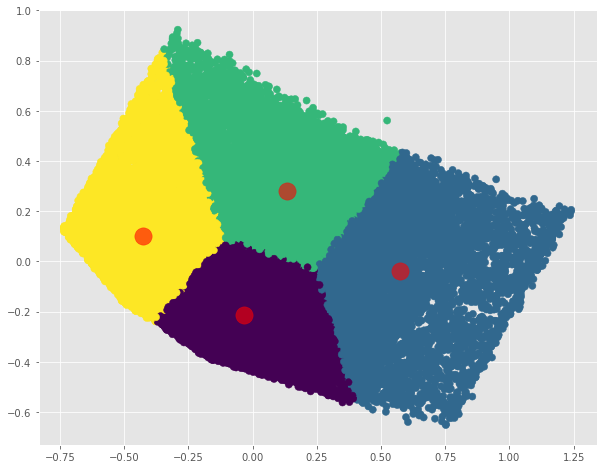

In [84]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(rfm_log)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=df.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);